<img style="float: right;" width="120" src="http://neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<img style="float: left; margin-top: 0" width="80" src="http://neueda.conygre.com/pydata/images/client-logo.png">
<br><br><br>


# Calculate the Bollinger Band for

> the month moving average of the Closing price for AAPL

## Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests

%matplotlib notebook

## Load the data into a DataFrame


In [15]:
# load AAPL data into df_Boll starting at 1/1/2000 from either
# a) pdr.get_data_yahoo OR
# b) 
df = pd.read_excel("market_data.xls",index_col='Date')

In [16]:
df.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2012-05-18  45.000000  38.000000  42.049999  38.230000  573576400  38.230000
2012-05-21  36.660000  33.000000  36.529999  34.029999  168192700  34.029999
2012-05-22  33.590000  30.940001  32.610001  31.000000  101786600  31.000000
2012-05-23  32.500000  31.360001  31.370001  32.000000   73600000  32.000000
2012-05-24  33.209999  31.770000  32.950001  33.029999   50237200  33.029999

In [17]:
df.tail()

High         Low        Open       Close    Volume  \
Date                                                                   
2019-12-19  206.300003  202.509995  202.779999  206.059998  16514600   
2019-12-20  207.710007  203.429993  207.479996  206.300003  27306900   
2019-12-23  208.589996  205.679993  206.699997  206.179993  13348900   
2019-12-24  206.789993  205.000000  206.300003  205.119995   6046300   
2019-12-26  207.820007  205.309998  205.570007  207.789993   9350700   

             Adj Close  
Date                    
2019-12-19  206.059998  
2019-12-20  206.300003  
2019-12-23  206.179993  
2019-12-24  205.119995  
2019-12-26  207.789993

In [18]:
df.describe()

High          Low         Open        Close        Volume  \
count  1914.000000  1914.000000  1914.000000  1914.000000  1.914000e+03   
mean    110.581280   108.205334   109.421369   109.436912  3.344617e+07   
std      57.225995    56.298253    56.765401    56.807324  2.995937e+07   
min      18.270000    17.549999    18.080000    17.730000  5.913100e+06   
25%      63.967500    62.212500    63.374999    63.107501  1.637122e+07   
50%     110.660000   108.654999   109.709999   109.730000  2.422525e+07   
75%     167.137501   163.375000   165.189999   165.377502  4.090102e+07   
max     218.619995   214.270004   215.720001   217.500000  5.735764e+08   

         Adj Close  
count  1914.000000  
mean    109.436912  
std      56.807324  
min      17.730000  
25%      63.107501  
50%     109.730000  
75%     165.377502  
max     217.500000

## Check what has been imported into the DataFrame
- Have a quick look at what we have read in
- No right or wrong way to do this
- Depends on your style, personal preferences, type of data being read in etc
- A few examples
> `df.tail()`
`df.head()`
`df.describe()`
    
**IMPORTANT**<br>
>When working with DataFrames that have Dates as an index, make sure the date values are sorted in an ascending manner

In [19]:
# get percent change (pct_change()) or Close prices, plot as histogram e.g. 50 bins
df['Close'].pct_change().plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

## Calculate the Bollinger Bands for the Adj. Close

- **Middle Band** = Monthly moving average <br>
- **Upper Band** = Monthly moving average + (Monthly standard deviation of price x 2) 
- **Lower Band** = Monthly moving average - (Monthly standard deviation of price x 2)

In [20]:
# 21 days is a good approximation of a single month
df["Middle"] = df['Close'].rolling(21).mean()
# get rolling mean and rolling avg of Close for 21 days
df["Upper"] = df["Middle"] + (2*df['Close'].rolling(21).std())
# calculate upper and lower bands columns as 2 above and 2 below std
df["Lower"] = df["Middle"] - (2*df['Close'].rolling(21).std())

## Plot the results

Use the matplot lib defaults

> of all data from the start of 2016 to the end of the series

Here use Slice from '2016 to the end

<IPython.core.display.Javascript object>


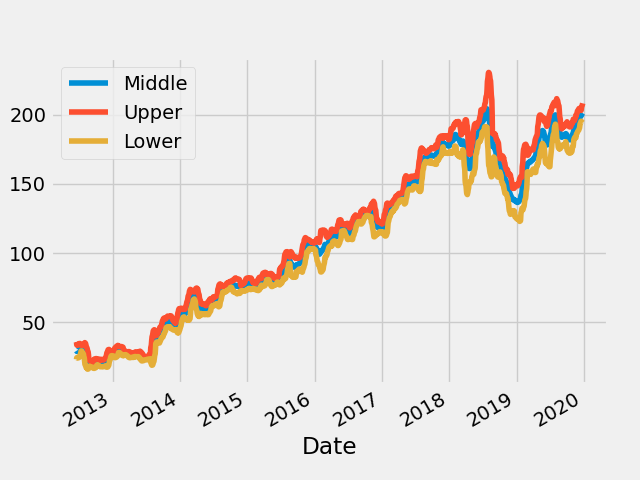

<AxesSubplot:xlabel='Date'>

In [21]:
# create a list of the column names we are interested in plotting
# 21d mavg, upper band, lower band, close
df[["Middle","Upper","Lower"]].plot()
# plot those columns for 2016

# Improve the presentation of the chart

- 'shading' in the regions between the upper and lower bands
- adding a title, a legend and some labels

The important parts of the python code are

> **style** - fivethirtyeight <br>
**figsize** - dimensions of plot in inches. This is an approximation for computer screens but is more accurate for printing plots<br>
**fill_between** - shades in areas betrween 2 lines

<IPython.core.display.Javascript object>


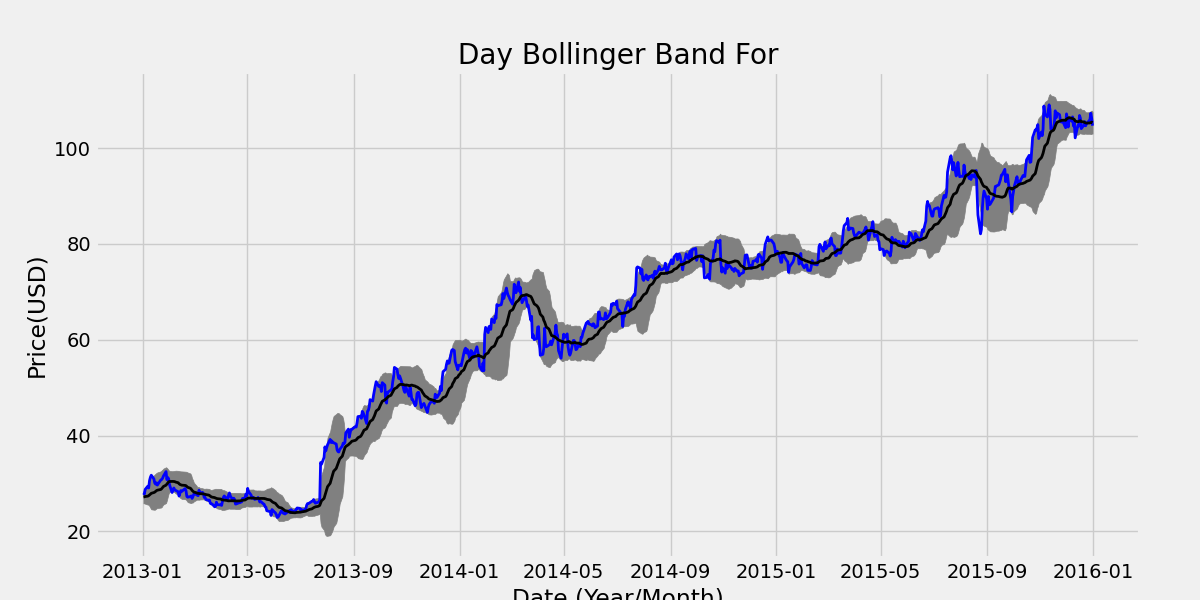

In [23]:
# create some variables
col = 'Close'
start = '2013'
end = '2015'

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df['2013':'2015'].index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df[start:end]['Upper'], 
                df[start:end]['Lower'], 
                color='grey')

ax.plot(x_axis, df[start:end][col], color='blue', lw=2)
ax.plot(x_axis, df[start:end]['Middle'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title(' Day Bollinger Band For ' )
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show();
